# Test Environment

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs # LinearSegmentedColormap
import random as rnd
import os
import IPython.display as ipd

from configurations import Config
from exercise_repository import ExerciseRepository
from defaults import Defaults
from statistics import Statistics
from csv_handler import CsvHandler
from timer import Timer
from map_elites import MapElites
from chromosome import Chromosome
from schedule import Schedule
from gene import Gene
from exercise import Exercise
from weight_loss_difference import WeightLossDifference

## Saving Results

In [2]:
def save_results(map_e: MapElites, config: Config, t_elapsed: int):
    statistics = Statistics(map_e)
    directory = "./../results/runtime_stats/"
    filename = f"{config.total_evaluations()}_evals.csv"
    
    csv_handler = CsvHandler(
        directory,
        filename,
        ["solutions", "execution_t", "fitness_mean", "fitness_std", "met_mean", "met_std"],
    )
    
    data = [
            statistics.count_solutions(),
            t_elapsed,
            statistics.mean_quality(),
            statistics.std_quality(),
            statistics.mean_met(),
            statistics.std_met()
        ]
    
    csv_handler.append(data)
    print(f"Results saved to {directory}{filename}.")

## Input Parameters

In [3]:
w0 = 126 # kg
wt = 64 # kg
P = 12 # weeks

## 1. Exercise Repository

In [4]:
repo = ExerciseRepository("./../data/compendium_small.csv")
print(repo)
repo.show()

EXERCISE REPOSITORY:
         Size: 96
    MET Range: 1 - 15
      Columns: ['idx', 'name', 'met', 'tags']

    idx                         name  met                   tags
0     0           Bicycling, general  7.0              Bicycling
1     1             Aerobic, general  7.3  Conditioning Exercise
2     2                 Calisthenics  4.4  Conditioning Exercise
3     3     Cicuit training, general  5.5  Conditioning Exercise
4     4  Elliptical trainer, general  7.0  Conditioning Exercise
..  ...                          ...  ...                    ...
91   91             Tai chi, general  3.6                 Sports
92   92              Tennis, general  6.8                 Sports
93   93     Trampoline, recreational  6.3                 Sports
94   94          Volleyball, general  5.5                 Sports
95   95           Wallyball, general  7.0                 Sports

[96 rows x 4 columns]


In [5]:
repo.item_at(rnd.choice(range(repo.size())))

idx                                12
name    Slide board exercise, general
met                              10.5
tags            Conditioning Exercise
Name: 12, dtype: object

## 2. Configurations

In [6]:
config = Config(w0, wt, P)

print(config)

CONFIGURATIONS:
Number of Initialisations: 1000
Number of Evaluations: 10000
Number of Map Bins: 20
EXERCISE REPOSITORY:
         Size: 96
    MET Range: 1 - 15
      Columns: ['idx', 'name', 'met', 'tags']

Initial Weight: 126
Target Weight: 64
Period: 12
Exercise Index Range: range(0, 96)
Exercise Duration Range: range(15, 721, 15)
Daily Duration Range: range(0, 481)
Daily Exercise Count Range: range(0, 11)
Tolerable Days: 1111111



## 3. Timer

In [7]:
t = Timer()

i = 0

t.start()
for _ in range(rnd.randint(100000,500000)):
    i  += 1
    
t.stop()
t.result()

0.01

## 4. Gene

In [8]:
genes = []
g = None

for i in range(5):
    if i == 0:
        g = Gene(config)
    else:
        for _ in range(5):
            g.alter()
    genes.append([str(g),g.exercise_index(),g.duration(),g.schedule_to_base(10),g.schedule_to_base(2),g.exercise_days()])

pd.DataFrame(genes, columns=["genotype","idx","duration","base10_schedule","base2_schedule","days"])

,genotype,idx,duration,base10_schedule,base2_schedule,days
0,"[58, 120, 111]",58,120,111,1101111,"[Monday, Tuesday, Thursday, Friday, Saturday, ..."
1,"[52, 255, 125]",52,255,125,1111101,"[Monday, Tuesday, Wednesday, Thursday, Friday,..."
2,"[20, 555, 124]",20,555,124,1111100,"[Monday, Tuesday, Wednesday, Thursday, Friday]"
3,"[43, 465, 106]",43,465,106,1101010,"[Monday, Tuesday, Thursday, Saturday]"
4,"[1, 465, 80]",1,465,80,1010000,"[Monday, Wednesday]"


## 5. Exercise

In [9]:
gene = Gene(config)
print(f"Gene: {str(gene)}\n")

exercise = Exercise(Gene(config), config)
print(exercise)

Gene: [63, 720, 67]

EXERCISE PHENOTYPE:
          Name: Resistance, general
      Category: Conditioning Exercise
     MET Value: 4.97
      Duration: 420 minutes
        Repeat: Tue, Thu, Sun
      Genotype: [5, 420, 41]
      Schedule: 0101001
     Frequency: 3



In [10]:
exercise.alter()
print(exercise)

EXERCISE PHENOTYPE:
          Name: Resistance, general
      Category: Conditioning Exercise
     MET Value: 4.97
      Duration: 420 minutes
        Repeat: Mon, Tue, Thu, Sat, Sun
      Genotype: [5, 420, 107]
      Schedule: 1101011
     Frequency: 5



In [11]:
print(repo.item_at(66))

idx                     66
name    Kung Fu Gymnastics
met                    5.5
tags                Sports
Name: 66, dtype: object


In [12]:
print("Mutation Rates:")
print(f"      Mutation: {int(config.mutation_rate()*100)}%")
print(f"    Alteration: {int(config.alteration_rate()*100)}%")
print(f"      Addition: {int(config.addition_rate()*100)}%")
print(f"      Deletion: {int(config.deletion_rate()*100)}%")

Mutation Rates:
      Mutation: 70%
    Alteration: 60%
      Addition: 20%
      Deletion: 20%


## 6. Chromosome

In [13]:
chromosome = Chromosome(config)
print(chromosome)

for _ in range(8):
    chromosome.mutate()
    print(chromosome)

pd.DataFrame(chromosome.genotype_to_list('deep'),
    columns=['exercise_index', 'duration', 'base10_schedule'],
    index = [f"Exercise {i+1}" for i in range(chromosome.size())]
)

[[91, 645, 108], [27, 345, 85], [75, 720, 59], [58, 540, 87], [77, 315, 84]]
[[91, 645, 108], [27, 345, 36], [75, 720, 59], [58, 540, 87], [77, 315, 84]]
[[91, 645, 108], [27, 345, 36], [75, 615, 59], [58, 540, 87], [77, 315, 84]]
[[91, 645, 108], [27, 345, 36], [33, 615, 59], [58, 540, 87], [77, 315, 84]]
[[91, 645, 108], [27, 345, 36], [33, 615, 59], [58, 540, 87], [77, 315, 70]]
[[91, 645, 108], [27, 345, 36], [33, 615, 59], [77, 315, 70]]
[[91, 645, 108], [27, 345, 36], [33, 615, 59], [77, 315, 70], [82, 150, 95]]
[[91, 645, 70], [27, 345, 36], [33, 615, 59], [77, 315, 70], [82, 150, 95]]
[[91, 645, 70], [27, 345, 36], [33, 615, 59], [77, 315, 70], [82, 150, 95]]


,exercise_index,duration,base10_schedule
Exercise 1,91,645,70
Exercise 2,27,345,36
Exercise 3,33,615,59
Exercise 4,77,315,70
Exercise 5,82,150,95


## 7. Schedule

In [14]:
chromosome = Chromosome(config)

print("GENOTYPE: ============================================")
print(chromosome)
schedule = Schedule(chromosome, config)
print("\nPHENOTYPE: ===========================================")
print(schedule)
print("FITNESS: =============================================")
print(schedule.fitness())
print("\nFEATURES: ============================================")
print(schedule.features())

GENOTYPE: ============================================
[[12, 180, 123], [2, 660, 58], [33, 705, 70], [0, 30, 28], [7, 465, 26]]

PHENOTYPE: ===========================================
MON: [(12,180),(33,705)]
TUE: [(12,180),(2,660)]
WED: [(12,180),(2,660),(0,30),(7,465)]
THU: [(12,180),(2,660),(0,30),(7,465)]
FRI: [(33,705),(0,30)]
SAT: [(12,180),(2,660),(33,705),(7,465)]
SUN: [(12,180)]

FITNESS: =============================================
25.7

FEATURES: ============================================
(6, 11, 9)


In [15]:
schedule.mutate()
print("GENOTYPE: ============================================")
print(schedule.genotype_to_list('deep'))
print("\nPHENOTYPE: ===========================================")
print(schedule)
print("FITNESS: =============================================")
print(schedule.fitness())
print("\nFEATURES: ============================================")
print(schedule.features())

GENOTYPE: ============================================
[[12, 180, 123], [90, 660, 58], [33, 705, 70], [0, 30, 28], [7, 465, 26]]

PHENOTYPE: ===========================================
MON: [(12,180),(33,705)]
TUE: [(12,180),(90,660)]
WED: [(12,180),(90,660),(0,30),(7,465)]
THU: [(12,180),(90,660),(0,30),(7,465)]
FRI: [(33,705),(0,30)]
SAT: [(12,180),(90,660),(33,705),(7,465)]
SUN: [(12,180)]

FITNESS: =============================================
24.63

FEATURES: ============================================
(6, 11, 9)


In [16]:
pd.DataFrame(schedule.mets(), index=Defaults.WEEK)

,0,1,2,3
Monday,10.5,4.3,0.0,0.0
Tuesday,10.5,4.0,0.0,0.0
Wednesday,10.5,4.0,7.0,9.3
Thursday,10.5,4.0,7.0,9.3
Friday,4.3,7.0,0.0,0.0
Saturday,10.5,4.0,4.3,9.3
Sunday,10.5,0.0,0.0,0.0


In [17]:
pd.DataFrame(schedule.durations(), index=Defaults.WEEK)

,0,1,2,3
Monday,180,705,0,0
Tuesday,180,660,0,0
Wednesday,180,660,30,465
Thursday,180,660,30,465
Friday,705,30,0,0
Saturday,180,660,705,465
Sunday,180,0,0,0


In [18]:
pd.DataFrame(
    schedule.frequencies(),
    index=[e.name() for e in schedule.exercises()],
    columns=["Frequency"]
)

,Frequency
"Slide board exercise, general",6
"Table tennis, ping pong",4
Archery,3
"Bicycling, general",3
"Stair treadmill ergometer, general",3


## 8. Objective Function: Weight Loss Difference

In [19]:
schedule.mutate()
of = WeightLossDifference(config, schedule.phenotype_to_list())
fit = of.run()
print(schedule.phenotype_to_list('deep'))
print(f"Fitness: {fit}")

[[[12, 180, 10.5], [33, 705, 4.3]], [[12, 180, 10.5], [90, 660, 4.0], [15, 180, 2.3]], [[12, 180, 10.5], [90, 660, 4.0], [0, 30, 7.0], [7, 465, 9.3]], [[12, 180, 10.5], [90, 660, 4.0], [0, 30, 7.0], [7, 465, 9.3]], [[33, 705, 4.3], [0, 30, 7.0]], [[12, 180, 10.5], [90, 660, 4.0], [33, 705, 4.3], [7, 465, 9.3], [15, 180, 2.3]], [[12, 180, 10.5]]]
Fitness: 25.47


## 9. MAP-Elites

In [20]:
t = Timer()
config = Config(w0, wt, P)
config.set_total_evaluations(1)

me = MapElites(config)
t.start()
me.run()
t.stop()
t_elapsed = t.result()
# print(f"Elapsed time: {f"{t_elapsed} seconds" if t_elapsed < 60 else f"{round(t_elapsed / 60, 2)} minutes"}")
print(f"Elapsed time: {t_elapsed} seconds")
print(f"Map Shape: {me.performances().shape}")
print(f"Solutions Found: {len(me.solutions())}")
print(f"Best Fitness: {me.performances().min()}")
print()
# save_results(me, config, t_elapsed)

Executing MAP-Elites for:
Initial Weight:     126 kg
Target Weight:      64 kg
Period:             12 weeks
Initialisations:    1000
Evaluations:        1
----------------------------------------
Iteration: 1 / 1
Successfully executed MAP-Elites over 1 iterations.
Elements skipped: 0
Elapsed time: 0.0 seconds
Map Shape: (20, 20, 20)
Solutions Found: 1
Best Fitness: 34.13



In [21]:
solutions = me.solutions()
params = []

for i in range(len(solutions)):
    s = solutions[i]
    es = s.exercises()
    row = [
        s.features(),
        s.fitness(),
        s.schedule_to_base(2),
        [(e.exercise_index(), e.duration(), e.schedule_to_base(2)) for e in es],
    ]
    params.append(row)
    
data_df = pd.DataFrame(params, columns=["features", "fitness", "base2_schedule", "exercises", ])
data_df

,features,fitness,base2_schedule,exercises
0,"(6, 13, 10)",34.13,1111111,"[(69, 675, 1001101), (78, 135, 0101111), (85, ..."


In [22]:
features_set = set(data_df.T.loc['features'])
len(features_set)

1

## 10. Statistics

In [23]:
stats = Statistics(me)
stats_df = stats.summarise()
stats_df

,Mean,Standard Deviation,Maximum,Minimum
Performance,34.13,0.00,34.13,34.13
Exercise Duration,308.57,257.21,705.00,135.00
MET Value,5.29,3.90,10.60,3.30
Exercises/Day,3.14,0.64,4.00,2.00


In [24]:
stats_df_detailed = stats.summarise(detailed=True)
stats_df_detailed

,mean_met,std_met,mean_duration,std_duration,week_schedule,total_exercises,mean_frequency,performance
0,5.292857,3.902648,308.571429,257.209813,1111111,22,4.4,34.13


## Analysis

### Heat Maps

In [25]:
# Test data
adam = {"initial_weight": 123, "target_weight": 65, "period": 4}
bryan = {"initial_weight": 130, "target_weight": 66, "period": 4 * 6}
charlie = {"initial_weight": 124, "target_weight": 63, "period": 4 * 12}
derek = {"initial_weight": 200, "target_weight": 80, "period": 4}
eline = {"initial_weight": 198, "target_weight": 72, "period": 4 * 6}
frederick = {"initial_weight": 205, "target_weight": 70, "period": 4 * 12}
gabriel = {"initial_weight": 92, "target_weight": 68, "period": 4}
hugo = {"initial_weight": 89, "target_weight": 66, "period": 4 * 6}
isabelle = {"initial_weight": 95, "target_weight": 67, "period": 4 * 12}

# Create DataFrame
input_df = pd.DataFrame(
    [
        adam, bryan, charlie, derek, eline, frederick,
        gabriel, hugo, isabelle
    ],
    index=[
        "Adam", "Bryan", "Charlie", "Derek", "Eline", "Frederick",
        "Gabriel", "Hugo", "Isabelle"
    ]
)
indexes = input_df.index
input_df

,initial_weight,target_weight,period
Adam,123,65,4
Bryan,130,66,24
Charlie,124,63,48
Derek,200,80,4
Eline,198,72,24
Frederick,205,70,48
Gabriel,92,68,4
Hugo,89,66,24
Isabelle,95,67,48


In [26]:
print(input_df.to_latex())

\begin{tabular}{lrrr}
\toprule
 & initial_weight & target_weight & period \\
\midrule
Adam & 123 & 65 & 4 \\
Bryan & 130 & 66 & 24 \\
Charlie & 124 & 63 & 48 \\
Derek & 200 & 80 & 4 \\
Eline & 198 & 72 & 24 \\
Frederick & 205 & 70 & 48 \\
Gabriel & 92 & 68 & 4 \\
Hugo & 89 & 66 & 24 \\
Isabelle & 95 & 67 & 48 \\
\bottomrule
\end{tabular}



In [27]:
output_df = pd.DataFrame(
    index=indexes,
    columns=["weight_difference","P","solutions", "execution_t", "best_fitness"],
)
output_df

,weight_difference,P,solutions,execution_t,best_fitness
Adam,NaN,NaN,NaN,NaN,NaN
Bryan,NaN,NaN,NaN,NaN,NaN
Charlie,NaN,NaN,NaN,NaN,NaN
Derek,NaN,NaN,NaN,NaN,NaN
Eline,NaN,NaN,NaN,NaN,NaN
Frederick,NaN,NaN,NaN,NaN,NaN
Gabriel,NaN,NaN,NaN,NaN,NaN
Hugo,NaN,NaN,NaN,NaN,NaN
Isabelle,NaN,NaN,NaN,NaN,NaN


In [28]:
def heat_maps(config, map_elites, save=False, show=False, instance_title=None, fname=None):
    w0 = config.initial_weight()
    wt = config.target_weight()
    P = config.period()
    initialisations = config.total_initialisations()
    evaluations = config.total_evaluations()
    
    cmap = clrs.LinearSegmentedColormap.from_list('my_map', [(0, 'red'), (1, 'white')])
    performances = map_elites.performances(True)
    
    shape = (1, 3)
    labels = ['Mean Exercise Duration', 'Mean MET', 'Mean Frequencies']
    label_size = 14
    performances_2d = [np.min(performances, axis=i) for i in range(2, -1, -1)]
    
    fig, [ax1, ax2, ax3] = plt.subplots(shape[0], shape[1], figsize=(10, 4), sharey=True)
    
    ax1.imshow(performances_2d[0], cmap=cmap, origin='lower')
    ax2.imshow(performances_2d[1], cmap=cmap, origin='lower')
    ax3.imshow(performances_2d[2], cmap=cmap, origin='lower')
    
    ax1.set_xlabel(labels[0], fontsize=label_size)
    ax2.set_xlabel(labels[2], fontsize=label_size)
    ax3.set_xlabel(labels[2], fontsize=label_size)
    
    ax1.set_ylabel(labels[1], fontsize=label_size)
    ax2.set_ylabel(labels[1], fontsize=label_size)
    ax3.set_ylabel(labels[0], fontsize=label_size)
    
    plt.tight_layout()
    
    # suptitle = f"MAP-Elites Minimum Heatmaps For {instance_title if instance_title is not None else f"$w_0={w0}$, $w_θ={wt}$, $P={P}$, $k_{'{'}init{'}'}={initialisations}$, $k_{'{'}evals{'}'}={evaluations}$"}" 
    # # fig.suptitle(suptitle,fontsize=18, y=0.65)
    
    if save:
        fig_name = f"./../results/heat_maps/{fname if fname is not None else f"{w0}_{wt}_{P}_{initialisations}_{evaluations}"}.png"
        plt.savefig(fig_name)

Iteration: 3808 / 10000

KeyboardInterrupt: 

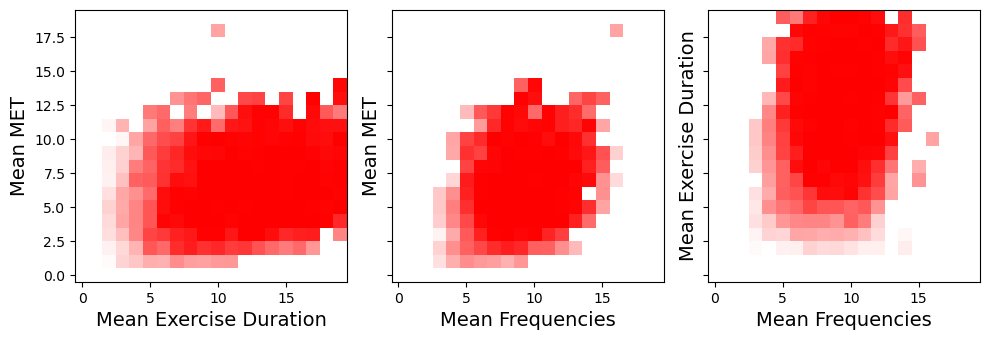

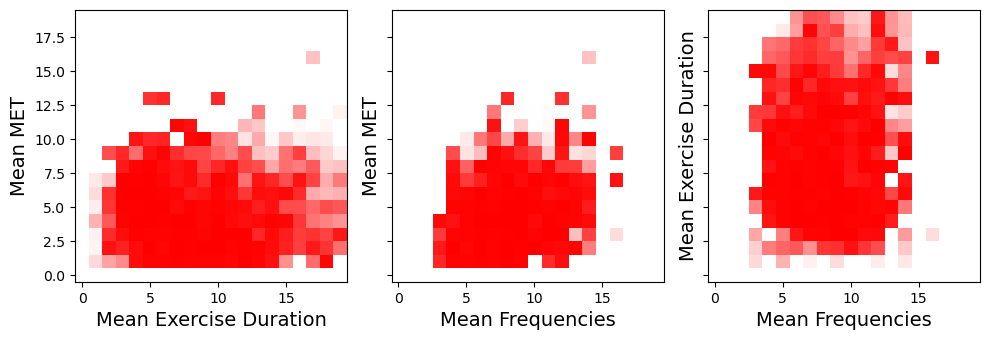

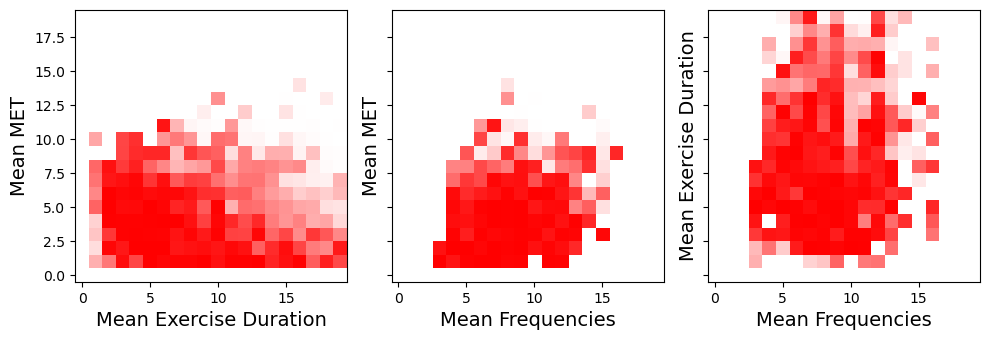

In [29]:
t = Timer()
counter = 0

for i in indexes:
    counter += 1
    data = input_df.loc[i]
    config = Config(data.initial_weight, data.target_weight, data.period)
    config.set_total_evaluations(10000)
    
    me = MapElites(config)
    t.start()
    me.run()
    t.stop()
    t_elapsed = t.result()
    
    heat_maps(config, me, save=True, show=False, fname=f"map_{i.lower()}.png")
    stats = Statistics(me)
    
    print(f"Elapsed time: {t_elapsed} seconds")
    print(f"Solutions Found: {len(me.solutions())}")
    print(f"Best Fitness: {me.performances().min()}")
    
    output_df.loc[i] = [
        data.initial_weight - data.target_weight,
        data.period,
        stats.count_solutions(),
        t_elapsed,
        stats.best_quality()
    ]
    
    ipd.clear_output(wait=True)
output_df

In [198]:
output_df

,weight_difference,P,solutions,execution_t,best_fitness
Adam,58,4,1190,4.77,0.0
Bryan,64,24,1293,5.36,0.0
Charlie,61,48,1236,7.11,0.09
Derek,120,4,1134,4.97,0.01
Eline,126,24,1253,5.78,0.02
Frederick,135,48,1263,7.18,0.02
Gabriel,24,4,1175,4.64,0.0
Hugo,23,24,1204,5.63,0.0
Isabelle,28,48,1198,6.76,0.02


In [206]:
print(output_df.loc[[i for i in ['Adam', 'Derek', 'Hugo', 'Isabelle']]].to_latex())

\begin{tabular}{llllll}
\toprule
 & weight_difference & P & solutions & execution_t & best_fitness \\
\midrule
Adam & 58 & 4 & 1190 & 4.770000 & 0.000000 \\
Derek & 120 & 4 & 1134 & 4.970000 & 0.010000 \\
Hugo & 23 & 24 & 1204 & 5.630000 & 0.000000 \\
Isabelle & 28 & 48 & 1198 & 6.760000 & 0.020000 \\
\bottomrule
\end{tabular}



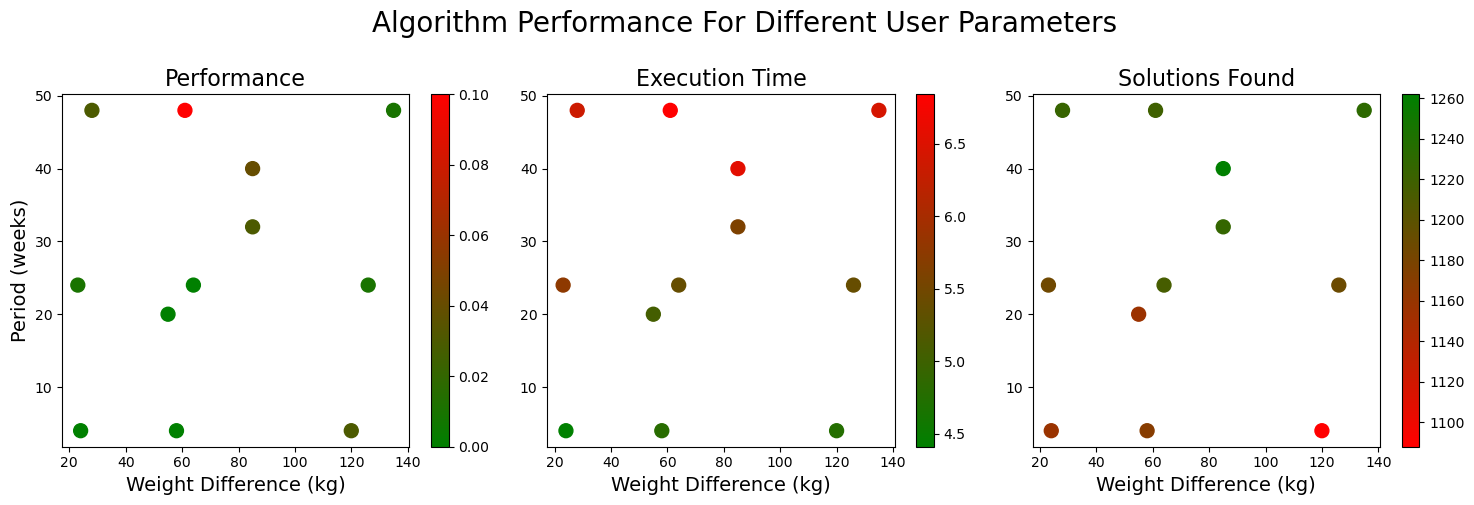

In [183]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
fig.suptitle("Algorithm Performance For Different User Parameters", size=20, y=1)

# Custom colour maps
cmap_perf = cmap_time = clrs.LinearSegmentedColormap.from_list('time_map', [(0, 'green'), (1, 'red')])
cmap_sol = clrs.LinearSegmentedColormap.from_list('sol_map', [(0, 'red'), (1, 'green')])

# Plot 1: Performance
sc1 = axes[0].scatter(output_df.weight_difference, output_df.P, c=output_df.best_fitness, cmap=cmap_perf, s=100)
axes[0].set_xlabel("Weight Difference (kg)", fontsize=14)
axes[0].set_ylabel("Period (weeks)", fontsize=14)
axes[0].set_title("Performance", fontsize=16)
plt.colorbar(sc1, ax=axes[0])

# Plot 2: Execution Time
sc2 = axes[1].scatter(output_df.weight_difference, output_df.P, c=output_df.execution_t, cmap=cmap_time, s=100)
axes[1].set_xlabel("Weight Difference (kg)", fontsize=14)
# axes[1].set_ylabel("Period (weeks)", fontsize=14)
axes[1].set_title("Execution Time", fontsize=16)
plt.colorbar(sc2, ax=axes[1])

# Plot 3: Solutions
sc3 = axes[2].scatter(output_df.weight_difference, output_df.P, c=output_df.solutions, cmap=cmap_sol, s=100)
axes[2].set_xlabel("Weight Difference (kg)", fontsize=14)
# axes[2].set_ylabel("Period (weeks)", fontsize=14)
axes[2].set_title("Solutions Found", fontsize=16)
plt.colorbar(sc3, ax=axes[2])

fig.tight_layout()

# Runtime Analysis

In [46]:
input_df

,initial_weight,target_weight,period
Bryan,124,64,12
Bob,200,70,672
Tania,60,50,12
Paul,80,55,336
Timmy,70,55,140
John,96,64,4


In [34]:
run = False

if run:
    data = bryan
    print(data)
    new_config = Config(data['initial_weight'], data['target_weight'], data['period'])
    
    evals = 850000
    step = 5000
    
    while evals <= 1000000:
        if evals >= 100000:
            step = 50000
            
        for _ in range(5):
            new_config.set_total_evaluations(evals)
            t.start()
            new_m = MapElites(new_config)
            new_m.run()
            t.stop()
            save_results(new_m, new_config, t.result())
            
            ipd.clear_output(wait=True)
        
        evals += step

In [35]:
path = "./../results/runtime_stats/"
filenames = [f for f in os.listdir(path)if f[-4:] == '.csv']

df_dicts = {k:v for k, v in zip(
    [int(f.split('_')[0]) for f in filenames],
    [pd.read_csv(path + f).mean() for f in filenames]
)}

means = pd.DataFrame(df_dicts).T.sort_index(ascending=True)
means = means[[col for col in means.columns[:6]]]
means.rename(columns={
    means.columns[0]: 'solutions',
    means.columns[1]: 'execution_t'
}, inplace=True)
idx = means.index
print(idx)
means.to_csv(f"./../results/runtime_stats/means/{path[5:-1].replace('/', '-')}.csv")
means

Index([   5000,   10000,   15000,   20000,   25000,   30000,   35000,   40000,
         45000,   50000,   55000,   60000,   65000,   70000,   75000,   80000,
         85000,   90000,   95000,  100000,  150000,  200000,  250000,  300000,
        350000,  400000,  450000,  500000,  550000,  600000,  650000,  700000,
        750000,  800000,  850000,  900000,  950000, 1000000],
      dtype='int64')


,solutions,execution_t,fitness_mean,fitness_std,met_mean,met_std
5000,799.600000,3.066,16.120000,15.206,4.472000,3.970000
10000,1203.000000,6.872,14.712000,15.186,4.586000,4.076000
15000,1463.000000,10.126,15.068000,16.036,4.710000,4.182000
20000,1719.000000,13.206,14.916000,16.148,4.764000,4.224000
25000,2034.000000,17.354,14.870000,16.330,4.860000,4.264000
30000,2206.200000,17.842,15.022000,16.626,5.006000,4.354000
35000,2278.000000,19.652,14.654000,16.584,4.866000,4.318000
40000,2438.400000,23.228,14.470000,16.592,5.040000,4.410000
45000,2635.800000,25.170,14.718000,16.726,5.112000,4.464000
50000,2703.000000,28.438,13.860000,16.396,5.110000,4.400000


Index([   5000,   10000,   15000,   20000,   25000,   30000,   35000,   40000,
         45000,   50000,   55000,   60000,   65000,   70000,   75000,   80000,
         85000,   90000,   95000,  100000,  150000,  200000,  250000,  300000,
        350000,  400000,  450000,  500000,  550000,  600000,  650000,  700000,
        750000,  800000,  850000,  900000,  950000, 1000000],
      dtype='int64')


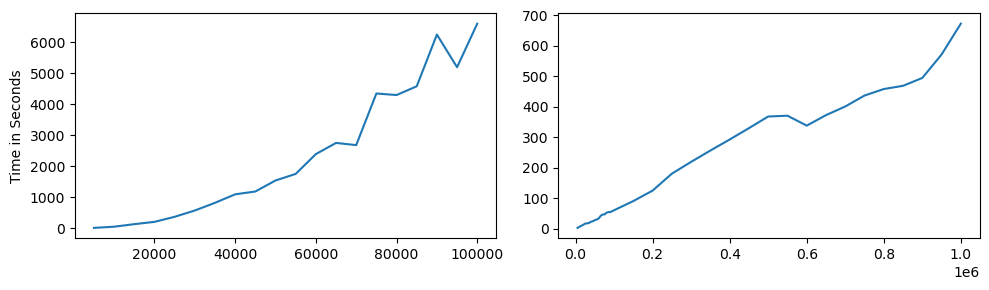

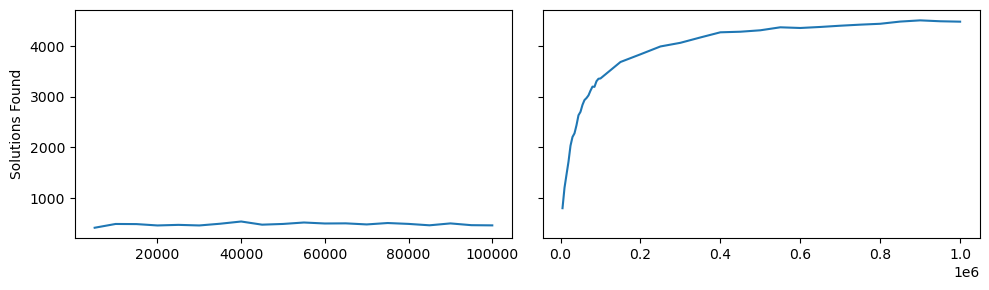

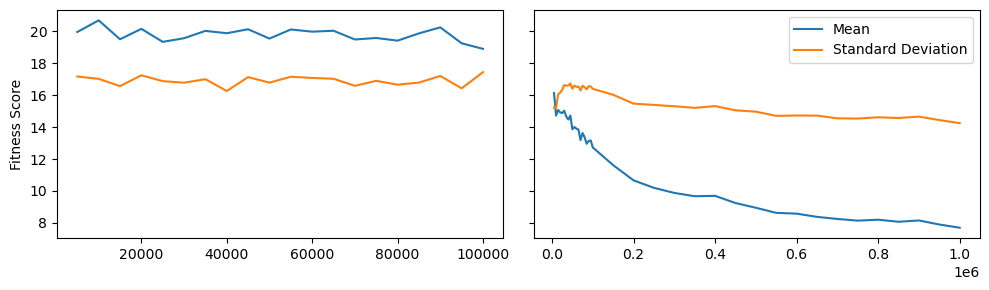

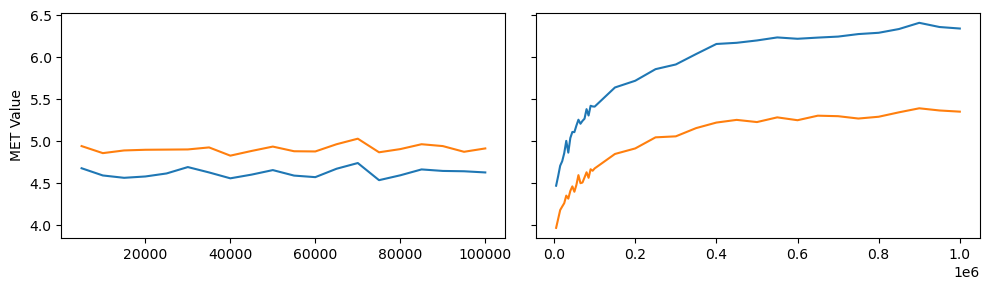

In [36]:
path = "./../results/runtime_stats/"
# path = "./../results/runtime_stats/old/"
filenames = [f for f in os.listdir(path)if f[-4:] == '.csv']
df_dicts = {k:v for k, v in zip(
    [int(f.split('_')[0]) for f in filenames],
    [pd.read_csv(path + f).mean() for f in filenames]
)}
means = pd.DataFrame(df_dicts).T.sort_index(ascending=True)
means = means[[col for col in means.columns[:6]]]
means.rename(columns={
    means.columns[0]: 'solutions',
    means.columns[1]: 'execution_t'
}, inplace=True)
idx = means.index
print(idx)
means.to_csv(f"./../results/runtime_stats/means/{path[5:-1].replace('/', '-')}.csv")

path = "./../results/runtime_stats/means/"
filenames = os.listdir(path)

dfs = [pd.read_csv(path+f, index_col=0) for f in filenames]
df0, df1 = dfs[0], dfs[1][dfs[1].index <= 1000000]

# --- 1. Execution Time ---
fig1, axes1 = plt.subplots(ncols=2, figsize=(10, 3))
axes1[0].plot(df0.index, df0.execution_t)
axes1[1].plot(df1.index, df1.execution_t)
axes1[0].set_ylabel("Time in Seconds")
fig1.tight_layout()

# --- 2. Solutions Found ---
fig2, axes2 = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)
axes2[0].plot(df0.index, df0.solutions)
axes2[1].plot(df1.index, df1.solutions, label="New Solutions")
axes2[0].set_ylabel("Solutions Found")
fig2.tight_layout()

# --- 3. Fitness Scores ---
fig3, axes3 = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)
axes3[0].plot(df0.index, df0.fitness_mean)
axes3[0].plot(df0.index, df0.fitness_std)
axes3[1].plot(df1.index, df1.fitness_mean, label="Mean")
axes3[1].plot(df1.index, df1.fitness_std,label="Standard Deviation")
axes3[0].set_ylabel("Fitness Score")
axes3[1].legend()
fig3.tight_layout()

# --- 4. MET Values ---
fig4, axes4 = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)
axes4[0].plot(df0.index, df0.met_mean, label="Old MET Mean")
axes4[0].plot(df0.index, df0.met_std, label="Old MET Std Dev")
axes4[1].plot(df1.index, df1.met_mean, label="New MET Mean")
axes4[1].plot(df1.index, df1.met_std, label="New MET Std Dev")
axes4[0].set_ylabel("MET Value")
fig4.tight_layout()

In [37]:
fig1.savefig(path + f"./../figures/exec_time.png")
fig2.savefig(path + f"./../figures/sols_found.png")
fig3.savefig(path + f"./../figures/fitness.png")
fig4.savefig(path + f"./../figures/met_vals.png")